# Generating pseudorandom numbers
## with the use of a chaotic map (tent function)

Generally speaking a chaotic map is a function such that for big $n$ the value of its $n$-th iteration on a fixed point is hard to be predicted. In other words: let's take a map $f: U \subset \mathbb{R} \rightarrow \mathbb{R}$ and let's take some $x_0 \in U$. We call $f$ a chaotic map if for big integers $n$ it is hard to predict (or evaluate) the value of $f^n(x_0)$.

### Tent map
The tent map with parameter $p\in[0,1]$ is the real-valued function $f_p$ defined by $f_p(x):=p \cdot \min\{x,\,1-x\}$.

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import logistic

Let's consider 4 lists of pseudorandom numbers generated with logistic distribution.

The lists are of length 10, 100, 1000 and 5000.

In [5]:
numbers_lists = [logistic.rvs(size=s) for s in [10, 100, 1000, 5000]]
normalized_numbers_lists = [normalize_list(list(l)) for l in numbers_lists]

N_list = [0, 1, 5, 12, 100]

In order to make them more "random", we will execute iterations of tent map on each list. The result will be checked with scatter plots showing the diffuseness of numbers.

### Functions

In [4]:
def normalize_list(numbers_list):
    if not type(numbers_list) is list:
        print('The list must be given')
        raise TypeError()
        
    Min = min(numbers_list)
    Range = max(numbers_list) - Min
    return [(float(i) - Min)/Range for i in numbers_list]

In [6]:
def create_tent_function(p):
    if p <= 0 or p >= 1:
        print('Parameter must be in the range [0,1]')
        raise ValueError()
        
    def tent_function(x):
        if x < 0 or x > 1:
            print('x must be in the range [0,1]')
            raise ValueError()
            
        return x / p if x < p else (1 - x) / (1 - p)
    
    return tent_function

def execute_tent_iterations(N, x, tent_function):
    if not (type(N) is int and N >= 0):
        print('N must be a non-negative integer')
        raise ValueError()
        
    if N == 0:
        return x
        
    if N == 1:
        return tent_function(x)
    
    return execute_tent_iterations(N - 1, tent_function(x), tent_function)

def execute_tent_iterations_on_list(N, numbers_list, tent_function):
    return [execute_tent_iterations(N, i, tent_function) for i in numbers_list]

def randomize_lists(N, p = 0.45, save = False):
    results = [
        execute_tent_iterations_on_list(N, numbers_list, create_tent_function(p))
        for numbers_list in normalized_numbers_lists
    ]
    
    if not save:
        return results
    
    for result in results:
        with open(f'{os.path.abspath(os.getcwd())}\\pseudorandom_numbers_{len(result)}.txt', 'w') as file:
            for number in result:
                file.write("%s\n" % number)
                
    print("Pseudorandom numbers have been saved in the files.")
    return results
        
def plot_randomized_lists():
    for N in N_list:
        i = 1
        print(f'Iterations number: {N}')
        plt.figure(figsize=(16, 5)) 
        for numbers_list in randomize_lists(N):
            plt.subplot(1, len(N_list), i, title = f'List length: {len(numbers_list)}')
            plt.scatter(numbers_list[:-1], numbers_list[1:], s = 1)
            i+=1
        plt.show()    

### Result
As one can see below, the bigger iteratins number is, the more randomized numbers we get.

Iterations number: 0


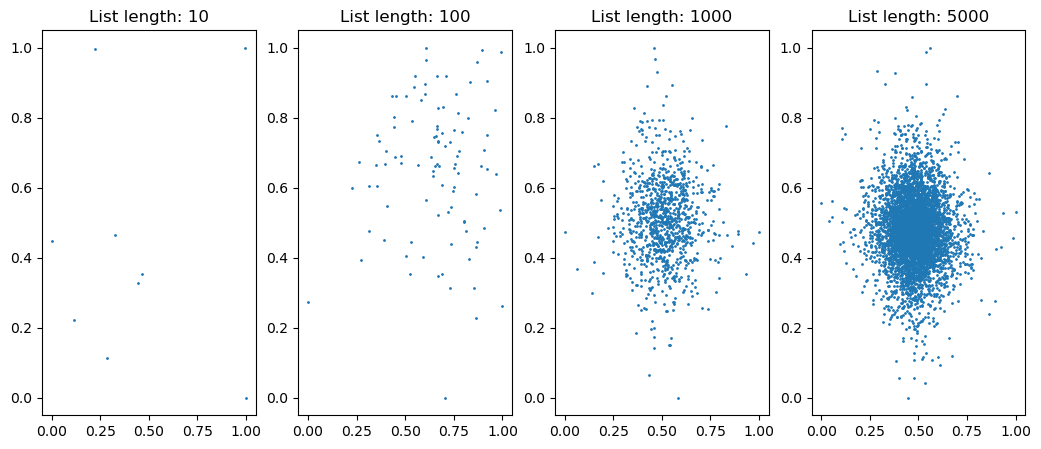

Iterations number: 1


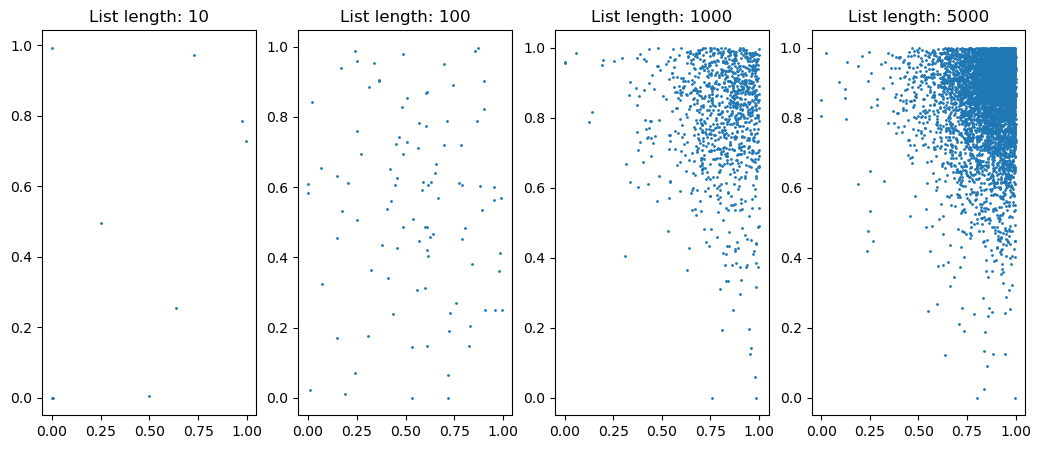

Iterations number: 5


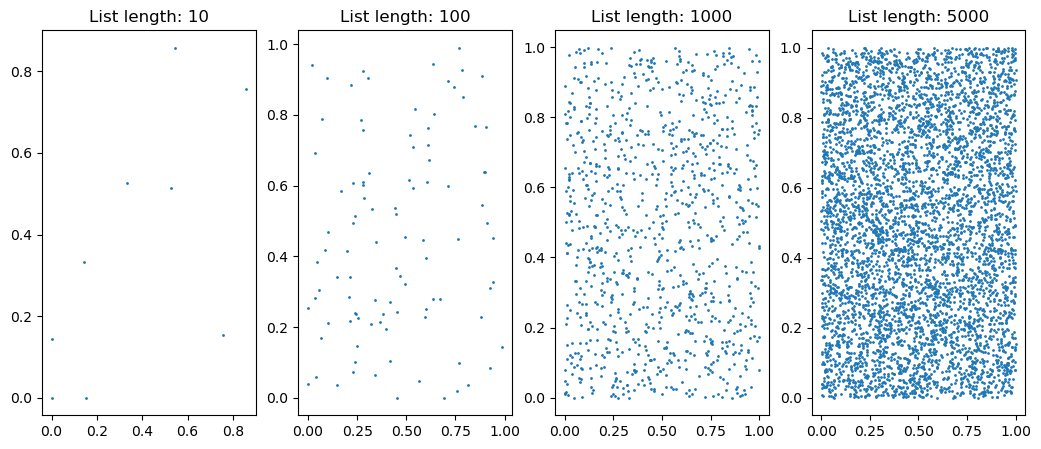

Iterations number: 12


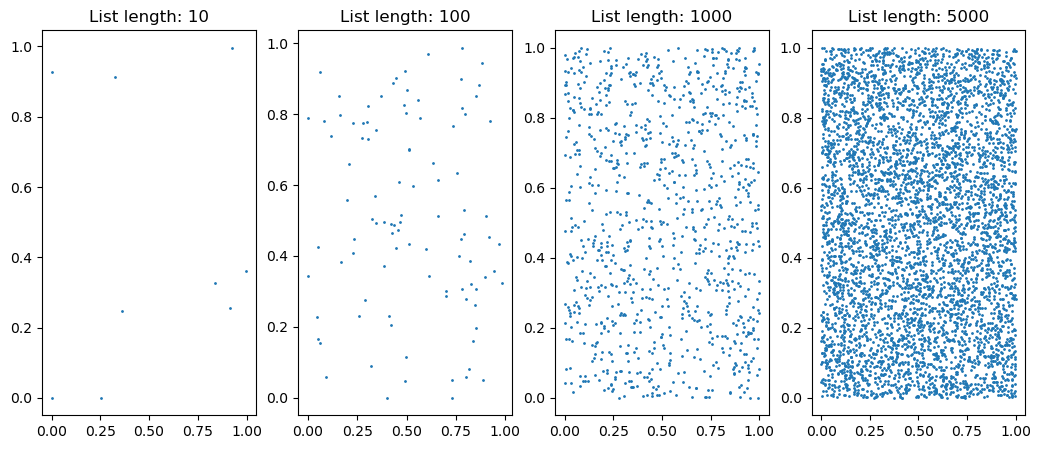

Iterations number: 100


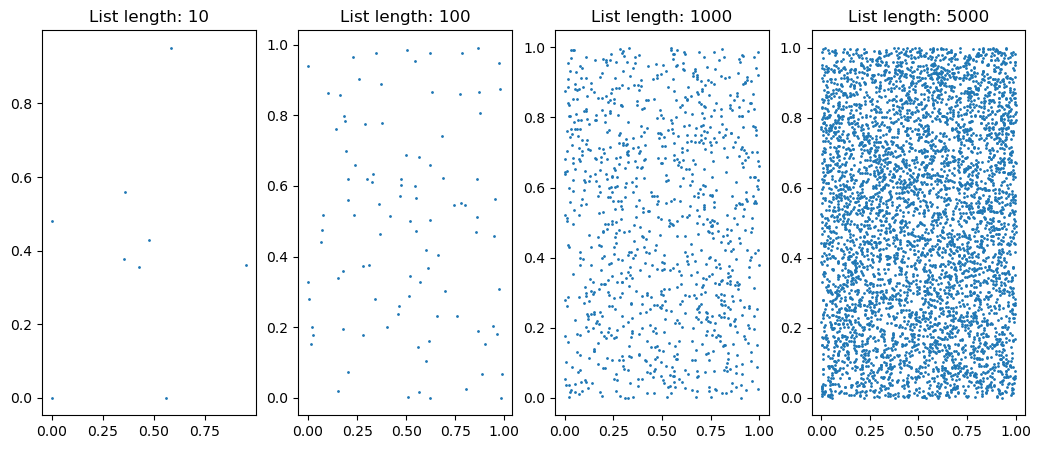

In [7]:
plot_randomized_lists()